In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
batch_size = 32
img_size = 224
seed = 123

### Dataset Link : https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals

In [3]:
trainDataset = image_dataset_from_directory(
    r"C:\Users\hemag\OneDrive\Desktop\datasets\animals\animals",
    validation_split = 0.1,
    subset = "training",
    seed = seed,
    image_size = (img_size, img_size),
    batch_size = batch_size
)
valDataset = image_dataset_from_directory(
    r"C:\Users\hemag\OneDrive\Desktop\datasets\animals\animals",
    validation_split = 0.1,
    subset = "validation",
    seed = seed,
    image_size = (img_size, img_size),
    batch_size = batch_size
)

Found 5400 files belonging to 90 classes.
Using 4860 files for training.
Found 5400 files belonging to 90 classes.
Using 540 files for validation.


In [4]:
len(trainDataset), len(valDataset)

(152, 17)

In [5]:
classNames = trainDataset.class_names
classNames

['antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',


In [17]:
import matplotlib.pyplot as plt

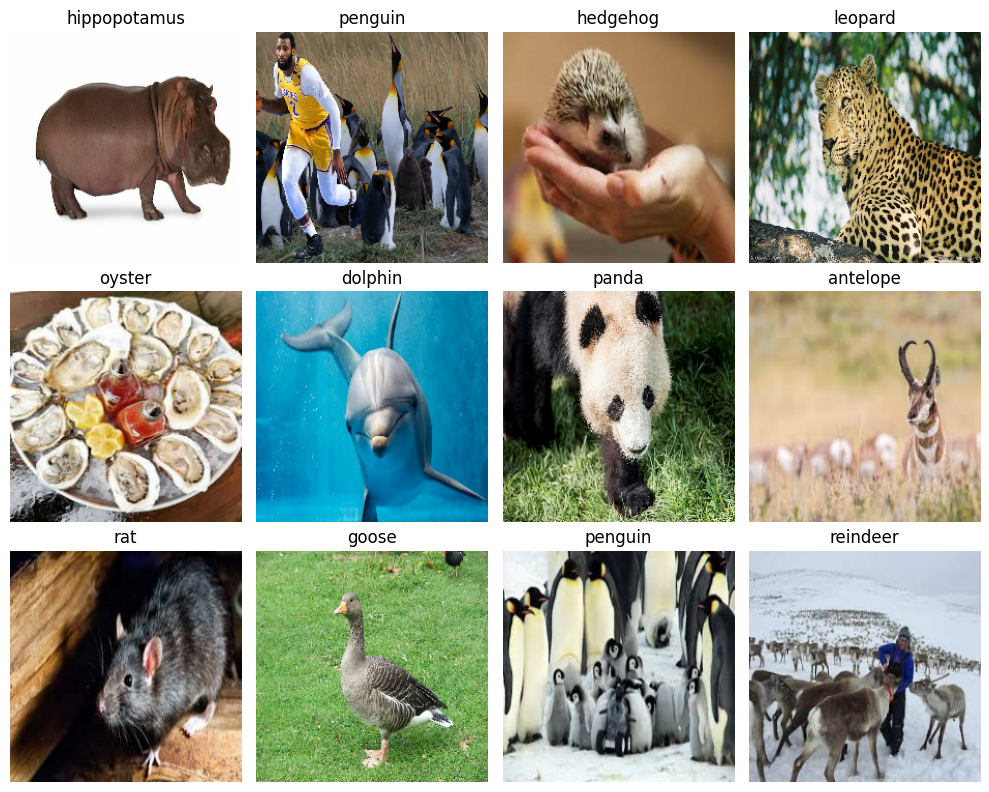

In [18]:
for images, labels in trainDataset.take(1):
    plt.figure(figsize = (10, 8))
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classNames[labels[i]])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [6]:
AUTOTUNE = tf.data.AUTOTUNE
trainDataset = trainDataset.cache().shuffle(10000).prefetch(buffer_size = AUTOTUNE)
valDataset = valDataset.cache().prefetch(buffer_size = AUTOTUNE)

In [7]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
dataAugmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1)
])

In [9]:
from tensorflow.keras.layers import Dense, Input, Rescaling, GlobalAvgPool2D, Dropout
from tensorflow.keras import Model
from tensorflow.keras.applications import EfficientNetB0

In [10]:
baseModel = EfficientNetB0(
    include_top = False,
    input_shape = (img_size, img_size, 3),
    weights = "imagenet"
)

In [11]:
baseModel.trainable = False

In [12]:
inputs = Input(shape = (img_size, img_size, 3))
x = dataAugmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = baseModel(x, training = False)
x = GlobalAvgPool2D()(x)
x = Dense(256, activation = "relu")(x)
x = Dropout(0.3)(x)
outputs = Dense(len(classNames), activation = "softmax")(x)
model = Model(inputs, outputs)

In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 90)                  │          23,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,400,637 (16.79 MB)

 Trainable params: 351,066 (1.34 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [14]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [15]:
history = model.fit(trainDataset, validation_data = valDataset, epochs = 10)

Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.3836 - loss: 3.0592 - val_accuracy: 0.8667 - val_loss: 0.5802
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.8541 - loss: 0.5801 - val_accuracy: 0.8870 - val_loss: 0.4027
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8915 - loss: 0.3796 - val_accuracy: 0.9148 - val_loss: 0.3177
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9215 - loss: 0.2730 - val_accuracy: 0.9111 - val_loss: 0.2937
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.9483 - loss: 0.1919 - val_accuracy: 0.9130 - val_loss: 0.2959
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.9602 - loss: 0.1582 - val_accuracy: 0.9259 - val_loss: 0.2985
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.9645 - loss: 0.1330 - val_accuracy: 0.9222 - val_loss: 0.2828
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.9637 - loss: 0.1243 - val_accu

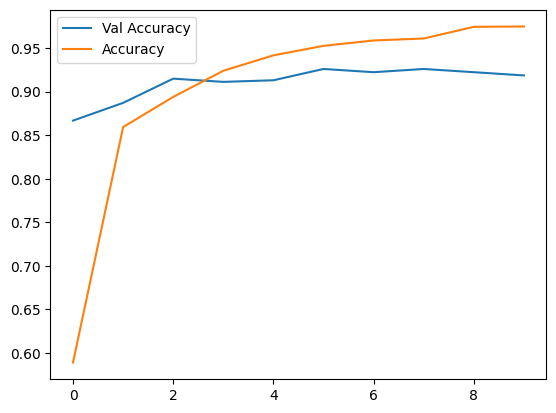

In [19]:
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.show()

In [20]:
model.evaluate(valDataset)

17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9210 - loss: 0.2846


[0.28772833943367004, 0.9185185432434082]

In [21]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


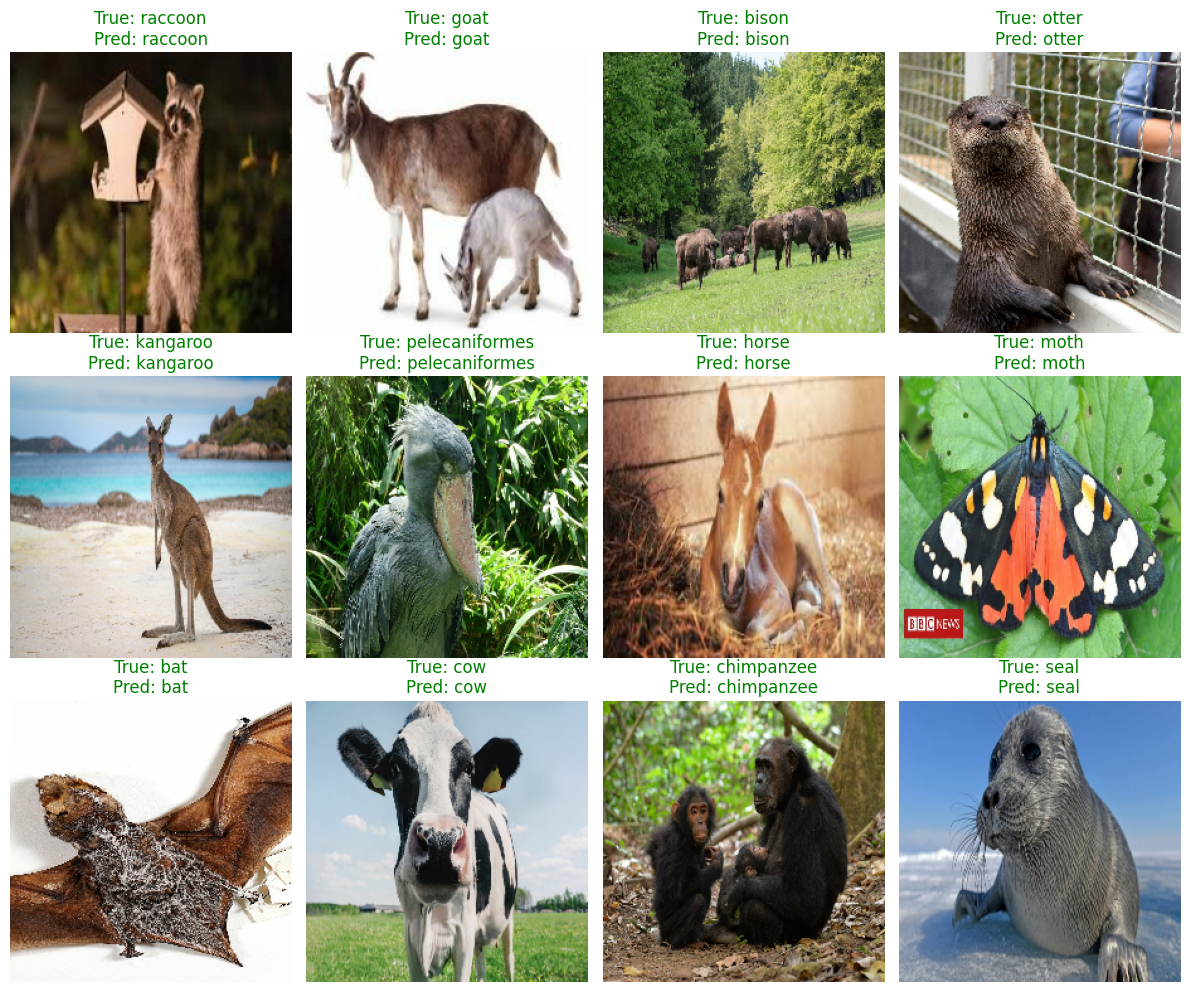

In [22]:
for images, labels in valDataset.take(1):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    plt.figure(figsize=(12, 10))
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = classNames[labels[i]]
        predicted_label = classNames[predicted_classes[i]]
        title_color = "green" if true_label == predicted_label else "red"
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=title_color)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [27]:
model.save(r"C:\Users\hemag\Downloads\animal_classifier_model.keras")